In [ ]:
#Downloading basics
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np

#setting the seed aka the number from which will start the random set
np.random.seed(0)
import matplotlib.pyplot as plt


In [ ]:
#getting the train and test from the dataset in keras and then the shapes

(x_train, Yt),(x_test,Yv) = cifar10.load_data()
x_train.shape, x_test.shape

170508288/170498071 [==============================] - 4s 0us/step


((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
#we manually set 32 bit numbers for both train and test

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
#We need to reshape the arrays in thw right form, in this case they already are.

x_train = np.reshape(x_train, (len(x_train), 1, 2)
x_test = np.reshape(x_test, (len(x_test),1,2 )

In [ ]:
#Adding the noise factor of 0.05

noise_factor = 0.05
x_train_noisy = x_train + noise_factor * np.random.normal(size = x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(size = x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

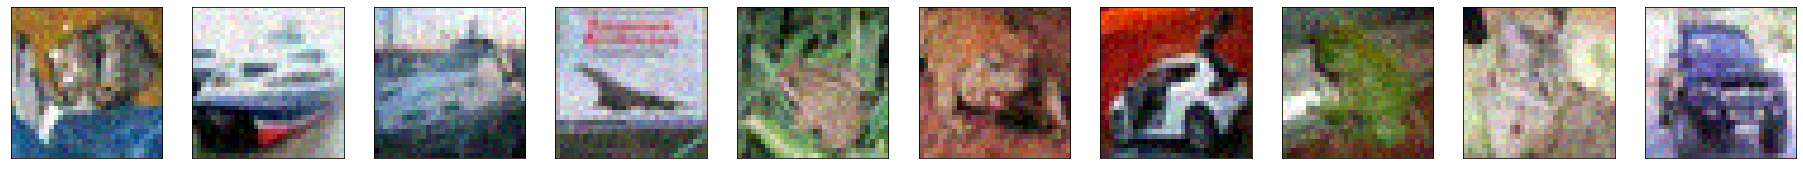

In [ ]:
#Visuals of 10 images

n = 10

plt.figure(figsize = (32, 3))

for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(x_test_noisy[i].reshape(32, 32, 3))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
#building our NN in order to enanche the images

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

input_img = Input(shape = (32, 32, 3))
x = Conv2D(32, (3, 3), activation = 'relu', padding = 'same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation = 'relu', padding = 'same')(x)

encoded = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
x = UpSampling2D((2,2))(x)

decoded = Conv2D(3, (3, 3),activation = 'sigmoid', padding = 'same')(x)
x = Conv2D(32, (3, 3), activation = 'relu', padding = 'same')(decoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(32, (3, 3), activation = 'relu', padding = 'same')(x)


autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          9248  

In [ ]:
#application of the NN to our cifar10 data
autoencoder.fit(x_train_noisy, x_train,epochs=170, batch_size = 128, validation_data=(x_test_noisy, x_test))

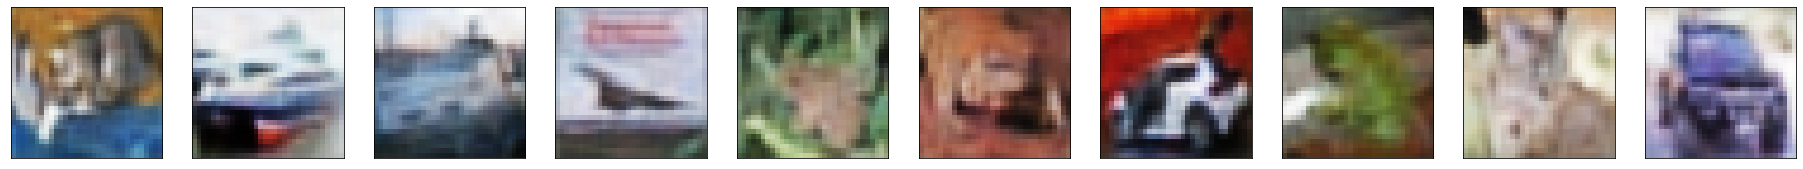

In [ ]:
#now doing the visualization on the previous pictures.


new_images = autoencoder.predict(x_test_noisy)

n = 10

plt.figure(figsize=(32, 3))

for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(new_images[i].reshape(32, 32, 3))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()



I don't really see much improvement in the resolution besides the less pixelation; however, we need to notice that we are working with high loss and low accuracy.
Even thought I am aware of the homework stating to denoise the image.